<h1>Protocolo de teletransportación</h1>

In [6]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_distribution
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import random_statevector

backed = AerSimulator(method="statevector") # Cómo lo vamos a correr

<h2>Previo al protocolo de teletransportación</h2>

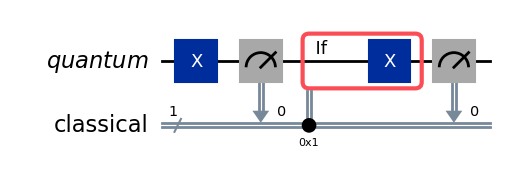

In [7]:
qr = QuantumRegister(1, 'quantum')
cr = ClassicalRegister(1, 'classical')
qc = QuantumCircuit(qr, cr)

qc.x(0)

qc.measure(qr, cr)

"""
    Si el resultado de la medición de qr es 1, entonces
    se aplica una compuerta x
"""

with qc.if_test((cr, 1)):
    qc.x(0)

qc.measure(qr, cr)

qc.draw('mpl')

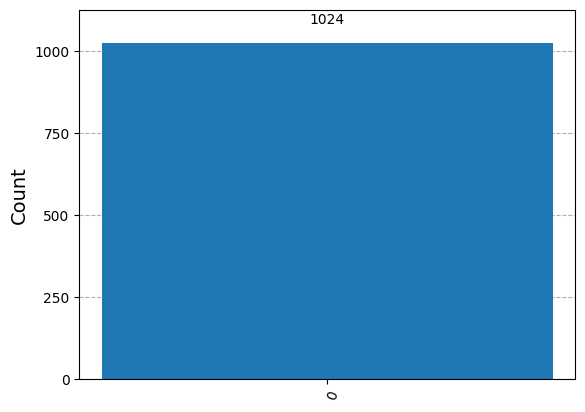

In [9]:
job = backed.run(qc, shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

<h2>Protocolo de teletransportación</h2>

In [23]:
psi = QuantumRegister(1, "\\psi")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
A_psi = ClassicalRegister(1, "$A_{\\psi}$")
A_bell = ClassicalRegister(1, "$A_{bell}$")

qc = QuantumCircuit(psi, A, B, A_psi, A_bell)

Ahora preparamos el estado $|\Psi^{+}\rangle$

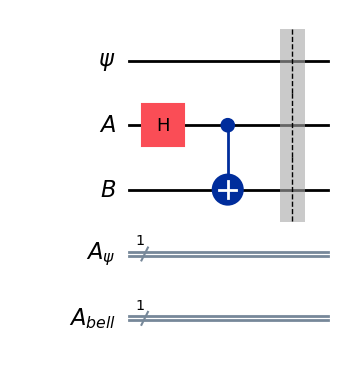

In [24]:
qc.h(A)
qc.cx(A, B)
qc.barrier()
qc.draw('mpl')

Alice opera con el qubit que desea enviar y su qubit en el estado de Bell

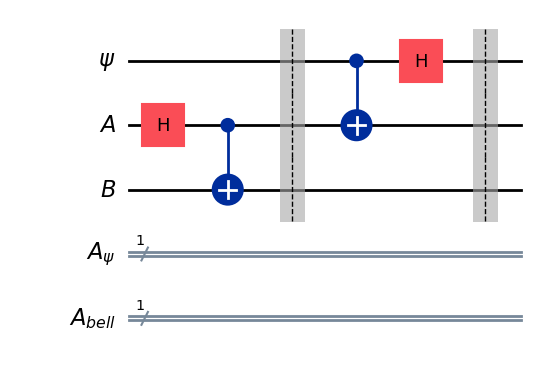

In [25]:
qc.cx(psi, A)
qc.h(psi)
qc.barrier()
qc.draw('mpl')

Alice mide sus qubits

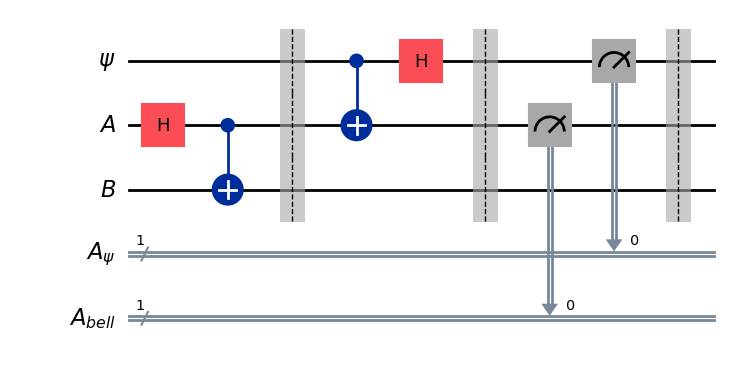

In [26]:
qc.measure(A, A_bell)
qc.measure(psi, A_psi)
qc.barrier()
qc.draw('mpl')

Bob aplica las acciones necesarias, dependiendo de lo que Alice le indique:

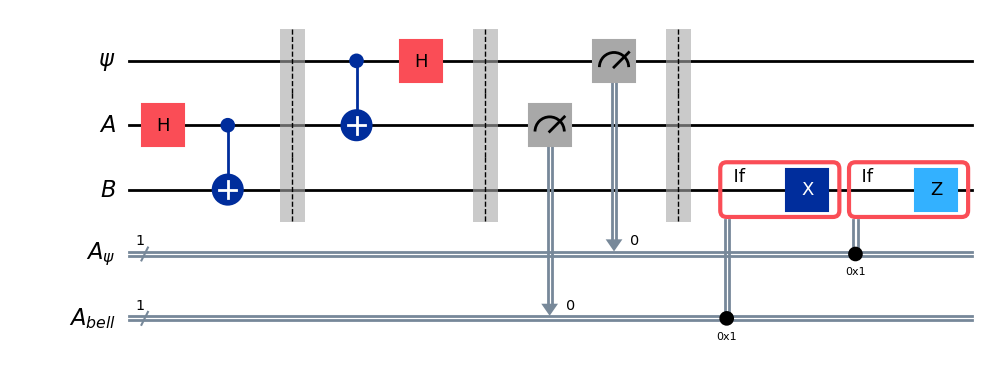

In [27]:
with qc.if_test((A_bell, 1)):
    qc.x(B)
with qc.if_test((A_psi, 1)):
    qc.z(B)

qc.draw('mpl')

Iniciamos $|\psi\rangle$ en $|1\rangle$

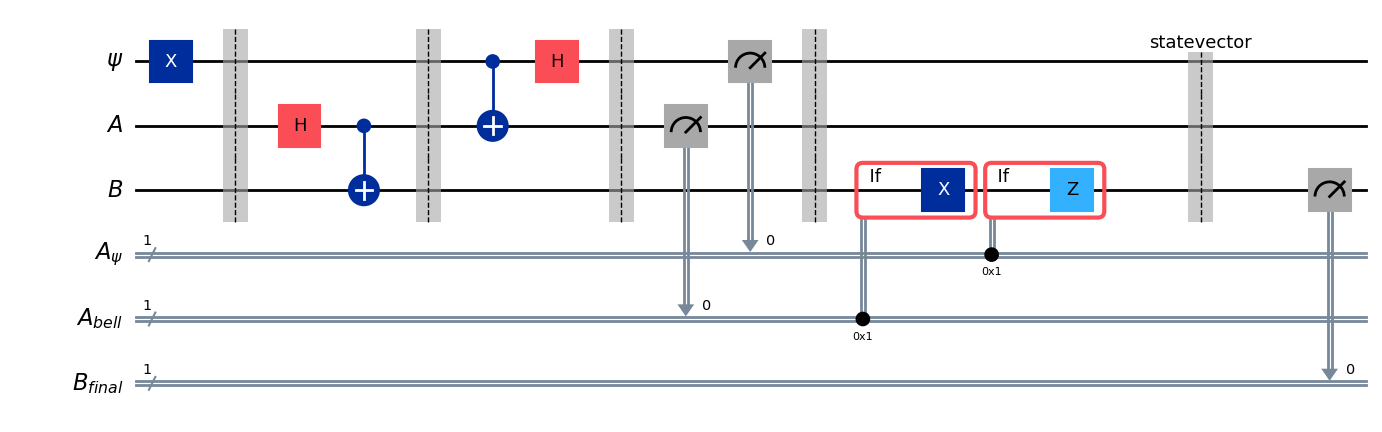

In [29]:
qc_prueba = QuantumCircuit(psi, A, B, A_psi, A_bell)

qc_prueba.x(psi)
qc_prueba.barrier()

# Unimos circuitos
qc_prueba = qc_prueba.compose(qc)
qc_prueba.save_statevector()

# Bob mide su qubit
B_final = ClassicalRegister(1, "$B_{final}$")
qc_prueba.add_register(B_final)
qc_prueba.measure(B, B_final)

qc_prueba.draw('mpl')

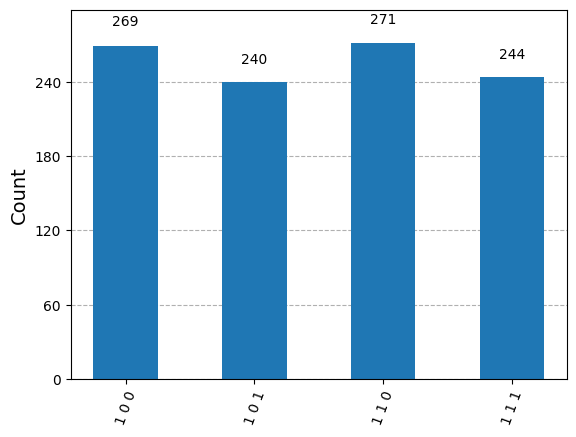

In [31]:
job = backed.run(qc_prueba, shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [32]:
resultados.get_statevector()

Statevector([ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
             -0.+0.0000000e+00j, -0.+0.0000000e+00j,  1.-1.2246468e-16j,
             -0.+0.0000000e+00j, -0.+0.0000000e+00j],
            dims=(2, 2, 2))


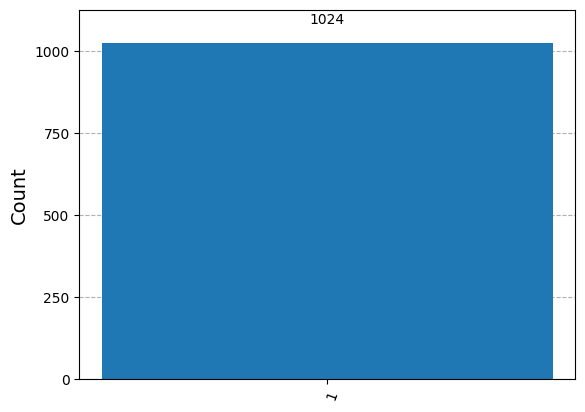

In [33]:
filtered_statistics = marginal_distribution(resultados.get_counts(), [2])
display(plot_histogram(filtered_statistics))

Iniciamos $|\psi\rangle$ en $|-\rangle$

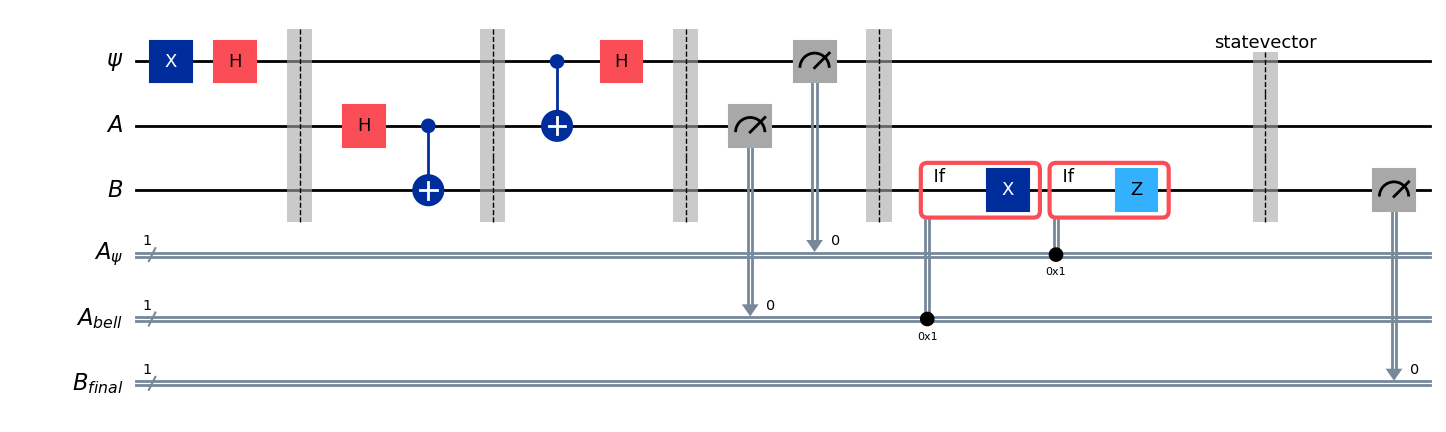

In [34]:
qc_prueba = QuantumCircuit(psi, A, B, A_psi, A_bell)

qc_prueba.x(psi)
qc_prueba.h(psi)
qc_prueba.barrier()

# Unimos circuitos
qc_prueba = qc_prueba.compose(qc)
qc_prueba.save_statevector()

# Bob mide su qubit
B_final = ClassicalRegister(1, "$B_{final}$")
qc_prueba.add_register(B_final)
qc_prueba.measure(B, B_final)

qc_prueba.draw('mpl')

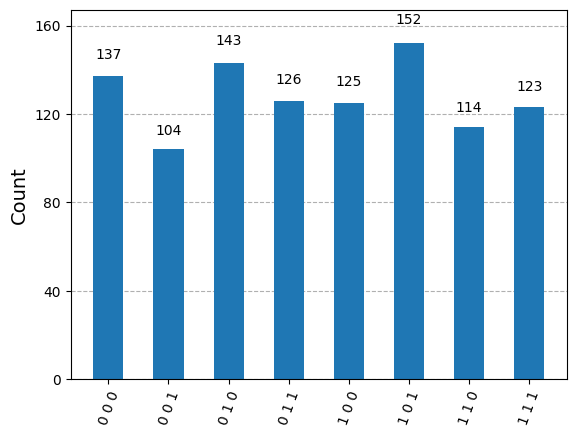

In [35]:
job = backed.run(qc_prueba, shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [36]:
resultados.get_statevector()

Statevector([ 0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             -0.70710678+1.73191211e-16j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2))


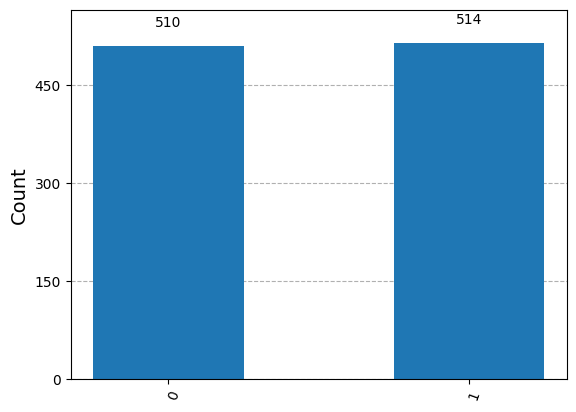

In [37]:
filtered_statistics = marginal_distribution(resultados.get_counts(), [2])
display(plot_histogram(filtered_statistics))

Iniciamos en un estado aleatorio

In [38]:
from qiskit.visualization import plot_bloch_multivector, array_to_latex

<IPython.core.display.Latex object>

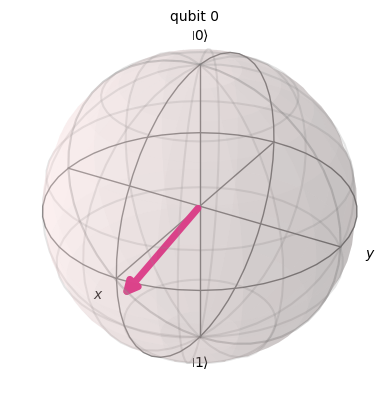

In [39]:
psi_ini = random_statevector(2) # Vector aleatorio con dos parámetros


display(array_to_latex(psi_ini, prefix="|\\psi\\rangle = "))
plot_bloch_multivector(psi_ini)

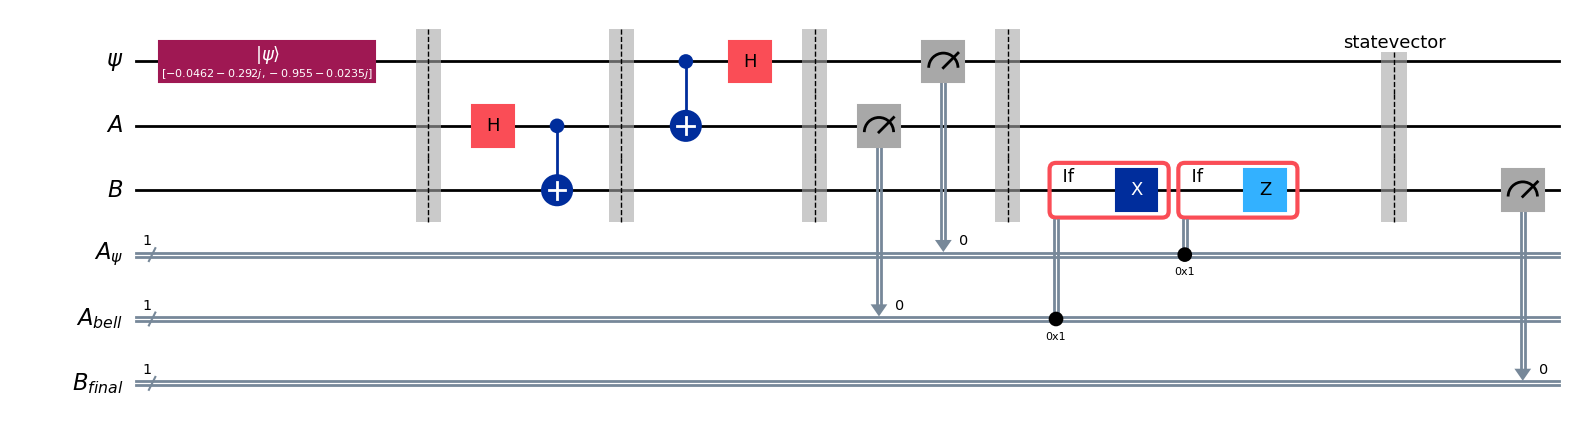

In [40]:
qc_prueba = QuantumCircuit(psi, A, B, A_psi, A_bell)

qc_prueba.initialize(psi_ini, 0) # Inicializamos Psi en Psi_ini
qc_prueba.barrier()

# Unimos circuitos
qc_prueba = qc_prueba.compose(qc)
qc_prueba.save_statevector()

# Bob mide su qubit
B_final = ClassicalRegister(1, "$B_{final}$")
qc_prueba.add_register(B_final)
qc_prueba.measure(B, B_final)

qc_prueba.draw('mpl')

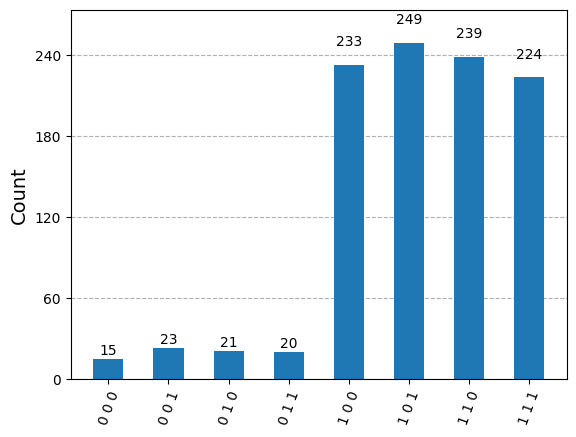

In [41]:
job = backed.run(qc_prueba, shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [42]:
resultados.get_statevector()

Statevector([-0.04624844-0.29157644j,  0.        +0.j        ,
              0.        -0.j        ,  0.        +0.j        ,
             -0.9551406 -0.0234669j ,  0.        +0.j        ,
              0.        -0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


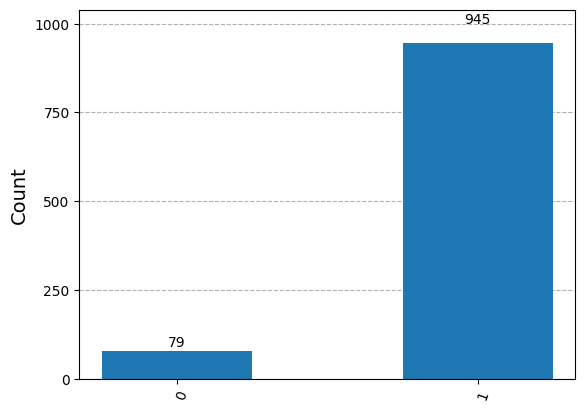

In [43]:
filtered_statistics = marginal_distribution(resultados.get_counts(), [2])
display(plot_histogram(filtered_statistics))

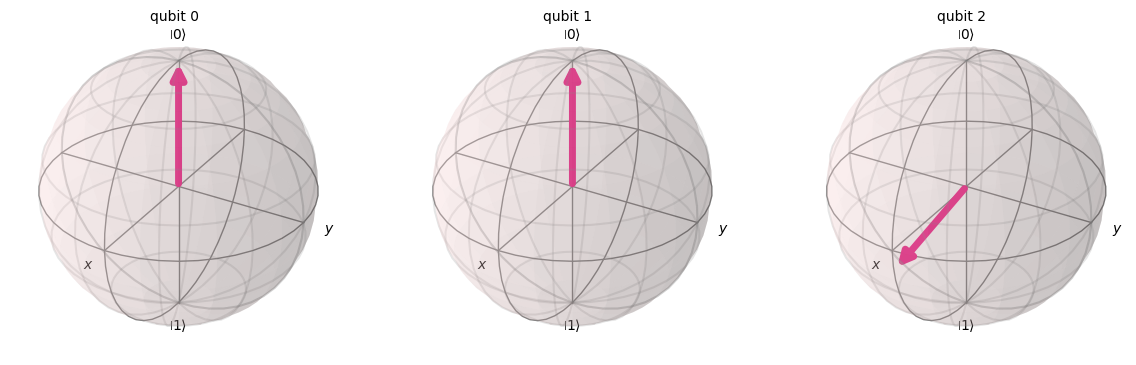

In [44]:
plot_bloch_multivector(resultados.get_statevector())

<h2>Algunas otras compuertas</h2>

<h3>Compuerta de fase (phase) P</h3>

Rotación alrededor del eje $z$.

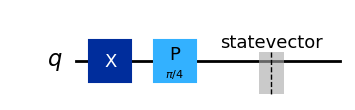

In [45]:
qc = QuantumCircuit(1)
qc.x(0)
qc.p(np.pi / 4, 0)
qc.save_statevector()

qc.draw('mpl')

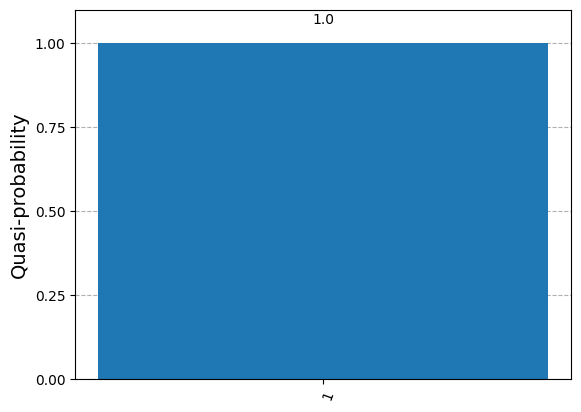

In [46]:
job = backed.run(qc, shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

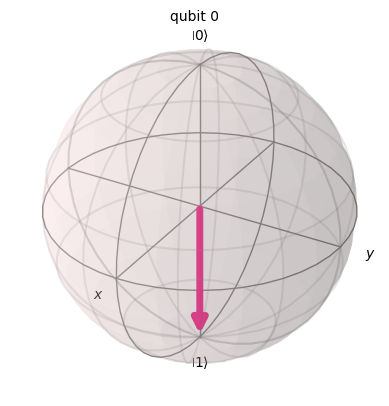

In [47]:
plot_bloch_multivector(resultados.get_statevector())

<h3>Compuerta S</h3>

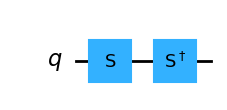

In [50]:
qc = QuantumCircuit(1)

qc.s(0)
qc.sdg(0)
qc.draw('mpl')

<h3>Compuerta T</h3>

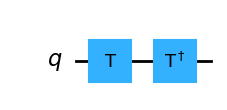

In [51]:
qc = QuantumCircuit(1)
qc.t(0)
qc.tdg(0)
qc.draw('mpl')

<h3>Compuerta U</h3>

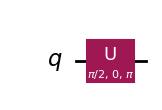

In [52]:
qc = QuantumCircuit(1)
qc.u(np.pi / 2, 0, np.pi, 0)
qc.draw('mpl')